In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [428]:
df_eng = pd.read_csv('tutor_data.csv').drop(columns='Unnamed: 0')

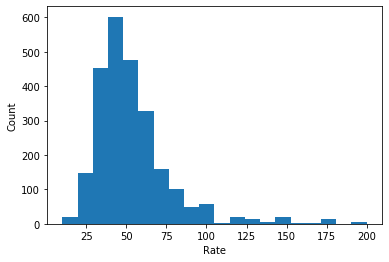

In [430]:
plt.hist(df_eng.rate, bins=20, range=(10,200))
plt.xlabel('Rate')
plt.ylabel('Count')
plt.show()

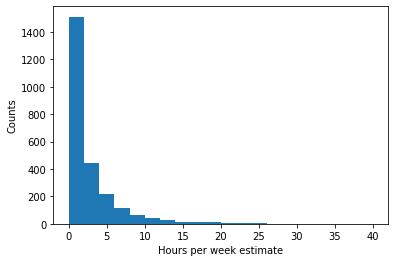

In [436]:
plt.hist(df_eng.hours_per_week_estimate, bins=20, range=(0,40))
plt.xlabel('Hours per week estimate')
plt.ylabel('Counts')
plt.show()

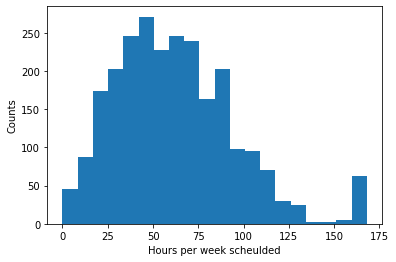

In [439]:
plt.hist(df_eng.hours_per_week_schedule, bins=20)
plt.xlabel('Hours per week scheulded')
plt.ylabel('Counts')
plt.show()

In [162]:
#dict_of_subjects = dict()
#for i in df_eng['subjects_all']:
#    x = i.replace('[', '').replace(']', '').split(',')
#    for item in x:
#        if (item in dict_of_subjects): 
#            dict_of_subjects[item] += 1
#        else: 
#            dict_of_subjects[item] = 1
#dict_of_subjects = sorted(dict_of_subjects.items(), key=lambda x: x[1], reverse=True)

In [441]:
def string_to_list(i):
    x = i.replace('[', '').replace(']', '').replace('\'', '').split(',')
    list_i = list()
    for j in x:
        list_i.append(j.lstrip().rstrip())
    return list_i

subjects_all_list = []
for i in df_eng['subjects_all']:
    subjects_all_list.append(string_to_list(i))
df_eng['subjects_list'] = np.array(subjects_all_list)

subjects_emph_list = []
for i in df_eng['subjects_emph']:
    subjects_emph_list.append(string_to_list(i))
df_eng['subjects_emph_list'] = np.array(subjects_emph_list)

#edu_list = []
#for i in df_eng['edu']:
#    edu_list.append(string_to_list(i))
#df_eng['edu_list'] = np.array(edu_list)

df_eng.drop(columns=['subjects_all','subjects_emph'], inplace=True)

In [442]:
# engineer subjects categories
feature = 'subjects_list'
size_subjects = len(df_eng[feature].explode().value_counts().index)
popular_subjects = list(df_eng[feature].explode().value_counts().index[:size_subjects//3])
mid_subjects = list(df_eng[feature].explode().value_counts().index[size_subjects//3:(size_subjects//3 + size_subjects//3)])
unpopular_subjects = list(df_eng[feature].explode().value_counts().index[(size_subjects//3 + size_subjects//3):])

unwanted = ''
if unwanted in popular_subjects:
    popular_subjects.remove(unwanted)
elif unwanted in mid_subjects:
    mid_subjects.remove(unwanted)
elif unwanted in unpopular_subjects:
    unpopular_subjects.remove(unwanted)

popular_list = []
mid_list = []
unpopular_list = []
for f in df_eng[feature]:
    num_popular = 0
    num_mid = 0
    num_unpopular = 0
    for j in f:
        if j in popular_subjects:
            num_popular += 1
        elif j in mid_subjects:
            num_mid += 1
        elif j in unpopular_subjects:
            num_unpopular += 1
    popular_list.append(num_popular)
    mid_list.append(num_mid)
    unpopular_list.append(num_unpopular)
df_eng['num_popular_subjects'] = np.array(popular_list)
df_eng['num_mid_subjects'] = np.array(mid_list)
df_eng['num_unpopular_subjects'] = np.array(unpopular_list)

In [443]:
df_eng.head()

,descriptions,rate,bio,edu,hours_sun,hours_mon,hours_tues,hours_wed,hours_thurs,hours_fri,...,hours_per_week_estimate,descriptions_length,bio_length,number_subjects,number_degrees,subjects_list,subjects_emph_list,num_popular_subjects,num_mid_subjects,num_unpopular_subjects
0,Computer Sciences BA Grad and Software Enginee...,30,"Hey all! I'm Alex, a full stack software engin...",['Northern Michigan University Computer Scienc...,14,6,6,6,6,6,...,16.459459,50,1027,8,1,"[HTML, SQL, Python, JavaScript, Elementary Mat...","[C#, Computer Science]",1,1,4
1,"Experienced, credentialed math teacher/tutor (...",80,The school year's in full swing! Feel free to ...,"['Stanford University Chemical Engineering', '...",0,2,4,4,0,2,...,6.551862,67,1674,10,3,[],"[Geometry, Prealgebra, Algebra 2, Precalculus,...",0,0,0
2,Tutor from Georgetown University,80,"Hello, I grew up mostly in New York City and w...",['(attending) Georgetown University undergrad'],9,13,13,13,13,13,...,0.641598,32,2040,8,1,"[Algebra 2, Precalculus, Physics, Calculus, Eu...",[],4,4,0
3,Fairfax County Tutor for HS Math and Science,45,I came to tutoring as a second career after re...,"['Fordham College at Rose Hill Physics', 'Univ...",10,10,10,10,10,10,...,6.188707,44,1103,12,2,"[Prealgebra, Precalculus, Trigonometry, ACT Ma...","[SOL, Chemistry, Algebra 2, Physics, Calculus,...",6,0,0
4,"Ivy League Kaplan Tutor for Math, Science, Eng...",65,As a graduate of a top tier university with 10...,['Columbia University - Teachers College under...,10,4,5,5,5,5,...,0.018337,68,1261,15,1,"[Geometry, Grammar, Biology, Spanish, Precalcu...","[Handwriting, Prealgebra, Algebra 2, ASVAB, El...",5,1,0


In [444]:
# engineer edu degree categories

undergrad = ['BA', 'B.A.', 'BS', 'B.S.', '']
postgrad = ['MS', 'M.S', 'MA', 'M.A', 'masters', 'Masters', 'CA', 'C.A', 
            'MBA', 'M.B.A', 'MD', 'M.D', 'PhD', 'Ph.D', 'Ph.D.', 'Graduate']
certified = ['education', 'Ced', 'certified']

undergrad_degree = []
postgrad_degree = []
certified_degree = []
for e in df_eng['edu']:
    undergrad_count = 0
    postgrad_count = 0
    certified_count = 0
    if any(x in e for x in undergrad):
        undergrad_count += 1
    if any(x in e for x in postgrad):
        postgrad_count += 1
    if any(x in e for x in certified):
        certified_count +=1
    undergrad_degree.append(undergrad_count)
    postgrad_degree.append(postgrad_count)
    certified_degree.append(certified_count)
df_eng['undergrad_degree'] = np.array(undergrad_degree)
df_eng['postgrad_degree'] = np.array(postgrad_degree)
df_eng['certified_degree'] = np.array(certified_degree)

In [448]:
# get university rankings
df_wur = pd.read_csv('world-university-rankings_cwurData.csv')
df_wur_select = df_wur[['institution', 'world_rank']]

list_of_top_schools = (list(df_wur_select['institution'][:30]) + 
['Berkeley', 'Caltech', 'Harvard', 'Yale', 'Princeton', 'MIT', 'Stanford'])

top_school = []
for e in df_eng['edu']:
    top = 0
    if any(x in e for x in list_of_top_schools):
        top += 1
    top_school.append(top)
df_eng['top_school'] = np.array(top_school)

In [475]:
cols_to_drop = ['descriptions', 'bio', 'subjects_list', 'subjects_emph_list', 'edu', 'bg_check_date', 'earliest_review_date']
df_drop = df_eng.drop(columns=cols_to_drop)

In [476]:
df_drop.drop_duplicates().shape

(2240, 21)

In [478]:
df_drop.columns

Index(['rate', 'hours_sun', 'hours_mon', 'hours_tues', 'hours_wed',
       'hours_thurs', 'hours_fri', 'hours_sat', 'hours_per_week_schedule',
       'hours_per_week_estimate', 'descriptions_length', 'bio_length',
       'number_subjects', 'number_degrees', 'num_popular_subjects',
       'num_mid_subjects', 'num_unpopular_subjects', 'undergrad_degree',
       'postgrad_degree', 'certified_degree', 'top_school'],
      dtype='object')